# About the data
## dataset diabetes: https://www.kaggle.com/uciml/pima-indians-diabetes-database

pada dataset terdapat 9 variabel diantaranya:
- pregnancy: angka berapa kali kehamilan
- glucose :  Konsentrasi glukosa plasma 2 jam dalam tes toleransi glukosa oral
- bloodpressure : Tekanan darah diastolik (mm Hg)
- skinthickness: Ketebalan lipatan kulit (mm)
- insulin : Insulin serum selama 2 jam (mu U/ml)
- Bmi : Indeks massa tubuh (berat dalam kg/(tinggi dalam m)^2)
- DiabetesPedigreeFunction : Fungsi silsilah diabetes
- age : usia
- outcome : label kelas 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, auc, roc_curve, precision_recall_curve, classification_report, accuracy_score,log_loss, confusion_matrix
import warnings
warnings.simplefilter(action='ignore', category=Warning)
import numpy as np


In [7]:
df=pd.read_csv('diabetes.csv')
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Data cleaning

Dalam statistik deskriptid di atas kita dapat melihat bahwa ada orang dengan BP =0(orang mati?),  ketebalan kulit =0 dan Glukosa =0 
itu merupakan hal yang tidak mungkin maka perlu mengubah 0 menjadi Nan

In [9]:
df["Glucose"] = df["Glucose"].apply(lambda x: np.nan if x == 0 else x)
df["BloodPressure"] = df["BloodPressure"].apply(lambda x: np.nan if x == 0 else x)
df["SkinThickness"] = df["SkinThickness"].apply(lambda x: np.nan if x == 0 else x)
df["Insulin"] = df["Insulin"].apply(lambda x: np.nan if x == 0 else x)
df["BMI"] = df["BMI"].apply(lambda x: np.nan if x == 0 else x)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [10]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

karena setelah melakukan cleaning data terdapat banyak missing value , kita perlu menenangani missing value

# Missing value

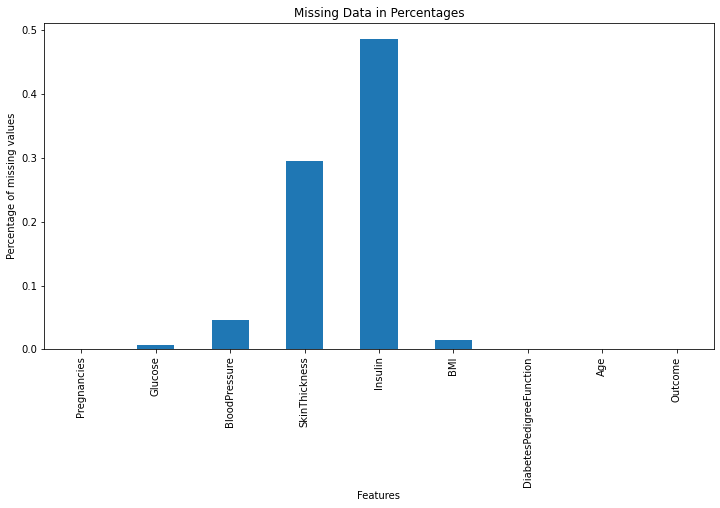

In [12]:
df.isnull().mean().plot.bar(figsize=(12,6)) 
plt.ylabel('Percentage of missing values') 
plt.xlabel('Features') 
plt.title('Missing Data in Percentages');

<AxesSubplot:>

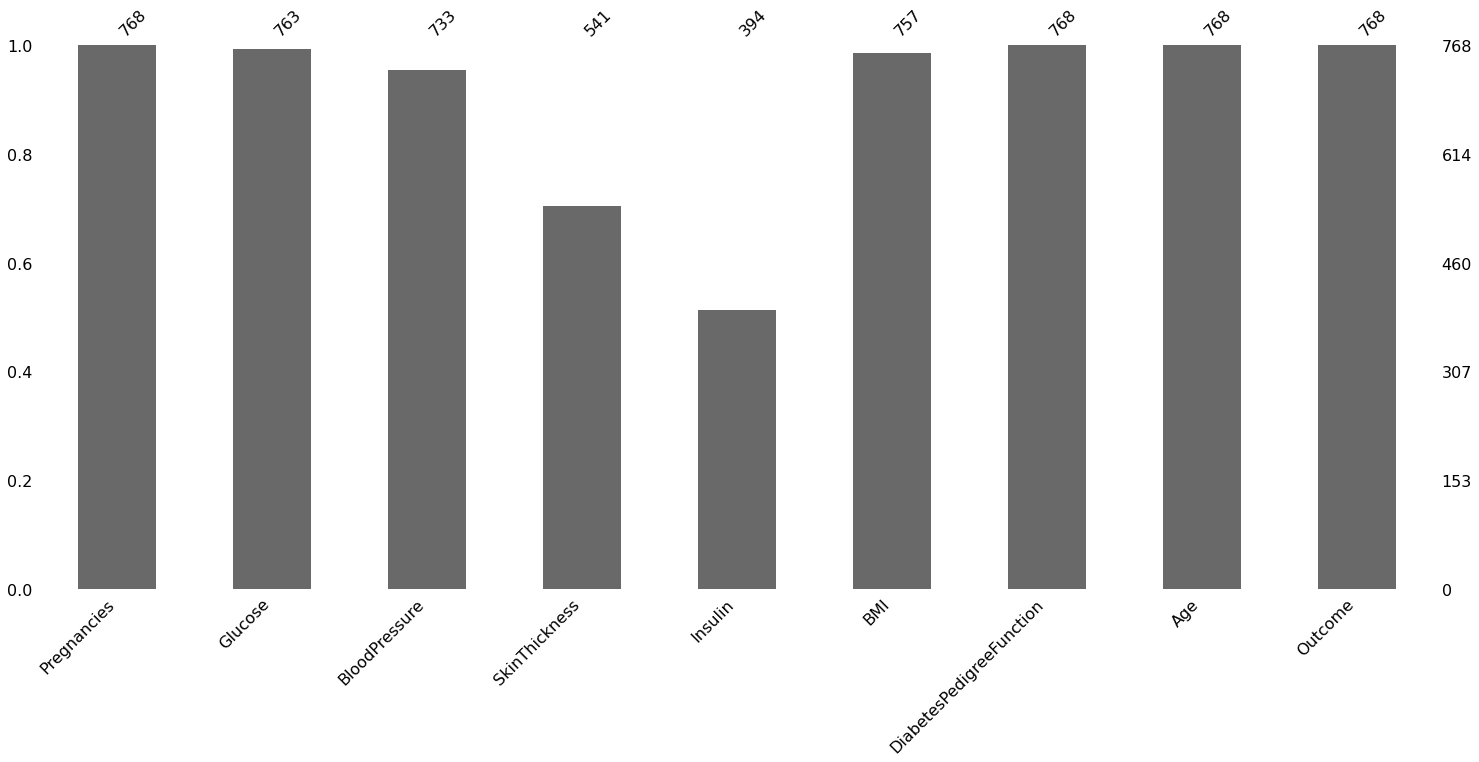

In [16]:
import missingno as msno
msno.bar(df)

In [18]:
assert.pd.notnull(df).all().all()

SyntaxError: invalid syntax (<ipython-input-18-11ffcb54ef14>, line 1)

# EDA